In this notebook, you will get to practice using TensorFlow Data Validation (TFDV), an open-source Python package from the TensorFlow Extended (TFX) ecosystem.

TFDV helps to understand, validate, and monitor production machine learning data at scale. It provides insight into some key questions in the data analysis process such as:

- What are the underlying statistics of my data?

- What does my training dataset look like?

How does my evaluation and serving datasets compare to the training dataset?

How can I find and fix data anomalies?

The figure below summarizes the usual TFDV workflow:



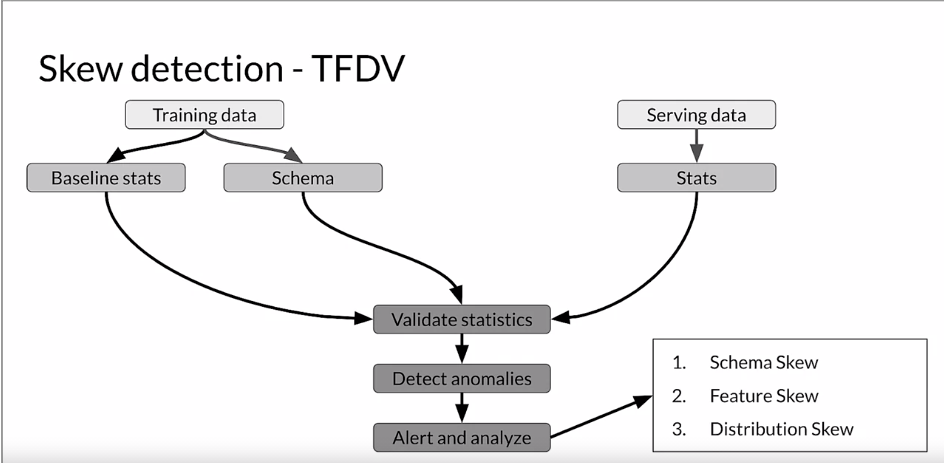

In [ ]:
!pip install tfx;
#!pip install util

    
    

     |████████████████████████████████| 2.4 MB 4.3 MB/s 
     |████████████████████████████████| 454.4 MB 8.2 kB/s 
     |████████████████████████████████| 189 kB 69.2 MB/s 
     |████████████████████████████████| 1.4 MB 64.8 MB/s 
     |████████████████████████████████| 1.3 MB 58.6 MB/s 
     |████████████████████████████████| 6.5 MB 42.9 MB/s 
     |████████████████████████████████| 1.7 MB 63.4 MB/s 
     |████████████████████████████████| 17.7 MB 77 kB/s 
     |████████████████████████████████| 135 kB 70.1 MB/s 
     |████████████████████████████████| 1.7 MB 70.1 MB/s 
     |████████████████████████████████| 40 kB 5.9 MB/s 
     |████████████████████████████████| 1.2 MB 69.5 MB/s 
     |████████████████████████████████| 147 kB 56.9 MB/s 
     |████████████████████████████████| 9.8 MB 40.8 MB/s 
     |████████████████████████████████| 19.0 MB 1.2 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 406 kB 66.9 MB/s 
     |█████████████

In [ ]:
def add_extra_rows(df):
    rows = [
        {
            'age': 46, 
            'fnlwgt': 257473, 
            'education': 'Bachelors', 
            'education-num': 8,
            'marital-status': 'Married-civ-spouse', 
            'occupation': 'Plumber', 
            'relationship': 'Husband', 
            'race': 'Other', 
            'sex': 'Male',
            'capital-gain': 1000, 
            'capital-loss': 0, 
            'hours-per-week': 41, 
            'native-country': 'Australia',
            'label': '>50K'
        },
        {
            'age': 0, 
            'workclass': 'Private', 
            'fnlwgt': 257473, 
            'education': 'Masters', 
            'education-num': 8,
            'marital-status': 'Married-civ-spouse', 
            'occupation': 'Adm-clerical', 
            'relationship': 'Wife', 
            'race': 'Asian', 
            'sex': 'Female',
            'capital-gain': 0, 
            'capital-loss': 0, 
            'hours-per-week': 40, 
            'native-country': 'Pakistan',
            'label': '>50K'
        },
        {
            'age': 1000, 
            'workclass': 'Private', 
            'fnlwgt': 257473, 
            'education': 'Masters', 
            'education-num': 8,
            'marital-status': 'Married-civ-spouse', 
            'occupation': 'Prof-specialty', 
            'relationship': 'Husband', 
            'race': 'Black', 
            'sex': 'Male',
            'capital-gain': 0, 
            'capital-loss': 0, 
            'hours-per-week': 20, 
            'native-country': 'Cameroon',
            'label': '<=50K'
        },
        {
            'age': 25, 
            'workclass': '?', 
            'fnlwgt': 257473, 
            'education': 'Masters', 
            'education-num': 8,
            'marital-status': 'Married-civ-spouse', 
            'occupation': 'gamer', 
            'relationship': 'Husband', 
            'race': 'Asian', 
            'sex': 'Female',
            'capital-gain': 0, 
            'capital-loss': 0, 
            'hours-per-week': 50, 
            'native-country': 'Mongolia',
            'label': '<=50K'
        }
    ]
    df = df.append(rows, ignore_index=True)
    
    return df

#Package Installation and Imports

In [ ]:
import tensorflow as tf
import tensorflow_data_validation as tfdv 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from tensorflow_metadata.proto.v0 import schema_pb2 

print(f'TFDV Version: {tfdv.__version__}')
print(f'TFDV Version: {tf.__version__}')

TFDV Version: 1.2.0
TFDV Version: 2.5.1


# Download the dataset

You will be working with the [Census Income Dataset](http://archive.ics.uci.edu/ml/datasets/Census+Income), a dataset that can be used to predict if an individual earns more than or less than 50k US Dollars annually. The summary of attribute names with descriptions/expected values is shown below and you can read more about it [in this data description file.](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names)


* **age**: continuous.
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: continuous.
* **capital-loss**: continuous.
* **hours-per-week**: continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Let's load the dataset and split it into training and evaluation sets. We will not shuffle them for consistent results in this demo notebook but you should otherwise in real projects.

In [ ]:
# read in the training and evaluation datasets
df = pd.read_csv('/content/drive/MyDrive/MLOPS/adult.data', skipinitialspace=True)

# split the dataset. 
train_df, eval_df = train_test_split(df, test_size=0.2, shuffle=False)

In [ ]:
# Preview the train and test set
train_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
eval_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
26048,30,Private,270886,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
26049,21,Private,216129,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,35,United-States,<=50K
26050,33,Private,189368,Some-college,10,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,United-States,>50K
26051,19,?,141418,Some-college,10,Never-married,?,Own-child,White,Male,0,0,15,United-States,<=50K
26052,19,Private,306225,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States,<=50K


From these few columns, you can get a first impression of the data. You will notice that most are strings and integers. There are also columns that are mostly zeroes. 

# Adding extra rows

To demonstrate how TFDV can detect anomalies later, you will add a few extra rows to the evaluation dataset. These are either malformed or have values that will trigger certain alarms later in this notebook. The code to add these can be seen in the `add_extra_rows()` function of `util.py` found in your Jupyter workspace. You can look at it later and even modify it after you've completed the entire exercise. For now, let's just execute the function and add the rows that we've defined by default.

In [ ]:
# add extra rows 
eval_df = add_extra_rows(eval_df)

# preview the added rows
eval_df.tail(4)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
6513,46,NaN,257473,Bachelors,8,Married-civ-spouse,Plumber,Husband,Other,Male,1000,0,41,Australia,>50K
6514,0,Private,257473,Masters,8,Married-civ-spouse,Adm-clerical,Wife,Asian,Female,0,0,40,Pakistan,>50K
6515,1000,Private,257473,Masters,8,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,20,Cameroon,<=50K
6516,25,?,257473,Masters,8,Married-civ-spouse,gamer,Husband,Asian,Female,0,0,50,Mongolia,<=50K


# Generate and visualise training dataset statistics

You can now compute and visualize the statistics of your training dataset. TFDV accepts three input formats: TensorFlow’s TFRecord, Pandas Dataframe, and CSV file. In this exercise, you will feed in the Pandas Dataframes you generated from the train-test split. 

You can compute your dataset statistics by using the [`generate_statistics_from_dataframe()`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/generate_statistics_from_dataframe) method. Under the hood, it distributes the analysis via [Apache Beam](https://beam.apache.org/) which allows it to scale over large datasets.

The results returned by this step for numerical and categorical data are summarized in this table:

| Numerical Data | Categorical Data   |
|:-:|:-:|
|Count of data records|Count of data records
|% of missing data records|% of missing data records|
|Mean, std, min, max|unique records|
|% of zero values|Avg string length|


In [ ]:
# Generate training dataset statistics
train_stats = tfdv.generate_statistics_from_dataframe(train_df)

In [ ]:
# visualise the training dataset 
tfdv.visualize_statistics(train_stats)

# Infer data schema
Next step is to create a data schema to describe your train set. Simply put, a schema describes standard characteristics of your data such as column data types and expected data value range. The schema is created on a dataset that you consider as reference, and can be reused to validate other incoming datasets.

With the computed statistics, TFDV allows you to automatically generate an initial version of the schema using the [`infer_schema()`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/infer_schema) method. This returns a Schema [protocol buffer](https://developers.google.com/protocol-buffers) containing the result. As mentioned in the [TFX paper](http://stevenwhang.com/tfx_paper.pdf) (Section 3.3), the results of the schema inference can be summarized as follows:

* The expected type of each feature.
* The expected presence of each feature, in terms of a minimum count and fraction of examples that must contain
the feature.
* The expected valency of the feature in each example, i.e.,
minimum and maximum number of values.
* The expected domain of a feature, i.e., the small universe of
values for a string feature, or range for an integer feature.


In [ ]:
schema = tfdv.infer_schema(statistics=train_stats)

# display the inferred schema
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'age',INT,required,,-
'workclass',STRING,required,,'workclass'
'fnlwgt',INT,required,,-
'education',STRING,required,,'education'
'education-num',INT,required,,-
'marital-status',STRING,required,,'marital-status'
'occupation',STRING,required,,'occupation'
'relationship',STRING,required,,'relationship'
'race',STRING,required,,'race'


/usr/local/lib/python3.7/dist-packages/tensorflow_data_validation/utils/display_util.py:180: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Values
Domain,
'workclass',"'?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'"
'education',"'10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'"
'marital-status',"'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'"
'occupation',"'?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'"
'relationship',"'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'"
'race',"'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'"
'sex',"'Female', 'Male'"
'native-country',"'?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'"
'label',"'<=50K', '>50K'"


# Generate and visualize evaluation dataset statistics

The next step after generating the schema is to now look at the evaluation dataset. You will begin by computing its statistics then compare it with the training statistics. It is important that the numerical and categorical features of the evaluation data belongs roughly to the same range as the training data. Otherwise, you might have distribution skew that will negatively affect the accuracy of your model.

TFDV allows you to generate both the training and evaluation dataset statistics side-by-side. You can use the visualize_statistics() function and pass additional parameters to overlay the statistics from both datasets (referenced as left-hand side and right-hand side statistics). Let's see what these parameters are:

- lhs_statistics: Required parameter. Expects an instance of DatasetFeatureStatisticsList.
- rhs_statistics: Expects an instance of DatasetFeatureStatisticsList to compare with lhs_statistics.
- lhs_name: Name of the lhs_statistics dataset.
- rhs_name: Name of the rhs_statistics dataset.

In [ ]:
# Generate evaluation dataset statistics 
eval_stats = tfdv.generate_statistics_from_dataframe(eval_df)

# compare training with evaluation
tfdv.visualize_statistics(
    lhs_statistics=eval_stats,
    rhs_statistics=train_stats,
    lhs_name='EVAL_DATASET',
    rhs_name='TRAIN_DATASET'
)

We encourage you to observe the results generated and toggle the menus to practice manipulating the visualization (e.g. sort by missing/zeroes). You'll notice that TFDV detects the malformed rows we introduced earlier. First, the `min` and `max` values of the `age` row shows `0` and `1000`, respectively. We know that those values do not make sense if we're talking about working adults. Secondly, the `workclass` row in the Categorical Features says that `0.02%` of the data is missing that particular attribute. Let's drop these rows to make the data more clean.

In [ ]:
# filter the age range
eval_df = eval_df[eval_df['age']>16]
eval_df = eval_df[eval_df['age']<91]

# drop missing values
eval_df.dropna(inplace=True)

In [ ]:
# compute the statistics again and see the difference in the results
eval_stats = tfdv.generate_statistics_from_dataframe(eval_df)

# compare training and evaluation
tfdv.visualize_statistics(
    lhs_statistics=eval_stats,
    rhs_statistics=train_stats,
    lhs_name='EVAL_DATASET',
    rhs_name='TRAIN_DATASET'
)

# Calculate and display evaluation anomalies

You can use your reference schema to check for anomalies such as new values for a specific feature in the evaluation data. Detected anomalies can either be considered a real error that needs to be cleaned, or depending on your domain knowledge and the specific case, they can be accepted.

Let's detect and display evaluation anomalies and see if there are any problems that need to be addressed.

In [ ]:
# check evaluation data for errors by validating teh evaluation dataset statistics using the reference schema
anomalies  = tfdv.validate_statistics(statistics=eval_stats, schema=schema)

# visualize anoamlies
tfdv.display_anomalies(anomalies)

/usr/local/lib/python3.7/dist-packages/tensorflow_data_validation/utils/display_util.py:217: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Anomaly short description,Anomaly long description
Feature name,,
'native-country',Unexpected string values,Examples contain values missing from the schema: Mongolia (<1%).
'race',Unexpected string values,Examples contain values missing from the schema: Asian (<1%).
'occupation',Unexpected string values,Examples contain values missing from the schema: gamer (<1%).


# Fix anomalies in the schema

Let's say that we want to accept the string anomalies reported as valid. If you want to tolerate a fraction of missing values from the evaluation dataset, you can do it like this:

# Revising the Schema

As shown in the results above, TFDV is able to detect the remaining irregularities we introduced earlier. The short and long descriptions tell us what were detected. As expected, there are string values for race, native-country and occupation that are not found in the domain of the training set schema (you might see a different result if the shuffling of the datasets was applied). What you decide to do about the anomalies depend on your domain knowledge of the data. If an anomaly indicates a data error, then the underlying data should be fixed. Otherwise, you can update the schema to include the values in the evaluation dataset.

TFDV provides a set of utility methods and parameters that you can use for revising the inferred schema. This reference lists down the type of anomalies and the parameters that you can edit but we'll focus only on a couple here.

- You can relax the minimum fraction of values that must come from the domain of a particular feature (as described by ENUM_TYPE_UNEXPECTED_STRING_VALUES in the reference):
- tfdv.get_feature(schema, 'feature_column_name').distribution_constraints.min_domain_mass = <float: 0.0 to 1.0>
- You can add a new value to the domain of a particular feature:
- tfdv.get_domain(schema, 'feature_column_name').value.append('string')
Let's use these in the next section.

# Fix anomalies in the schema

Let's say that we want to accept the string anomalies reported as valid. If you want to tolerate a fraction of missing values from the evaluation dataset, you can do it like this:

In [ ]:
# Relax the minimum fraction of values that must come from the domain for the feature `native-country`
country_feature = tfdv.get_feature(schema, 'native-country')
country_feature.distribution_constraints.min_domain_mass = 0.9

# Relax the minimum fraction of values that must come from the domain for the feature `occupation`
occupation_feature = tfdv.get_feature(schema, 'occupation')
occupation_feature.distribution_constraints.min_domain_mass = 0.9

In [ ]:
# check evaluation data for errors by validating teh evaluation dataset statistics using the reference schema
anomalies  = tfdv.validate_statistics(statistics=eval_stats, schema=schema)

# visualize anoamlies
tfdv.display_anomalies(anomalies)

/usr/local/lib/python3.7/dist-packages/tensorflow_data_validation/utils/display_util.py:217: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Anomaly short description,Anomaly long description
Feature name,,
'race',Unexpected string values,Examples contain values missing from the schema: Asian (<1%).


If you want to be rigid and instead add only valid values to the domain, you can do it like this: 

In [ ]:
# Add new value to the domain of the feature `race`
race_domain = tfdv.get_domain(schema, 'race')
race_domain.value.append('Asian')

In addition, you can also restrict the range of a numerical feature. This will let let you know of invalid values without having to inspect it visually

In [ ]:
# Restrict the range of the age feature 
tfdv.set_domain(schema, 'age', schema_pb2.IntDomain(name='age', min=17, max=90))

# Display the modified schema. Notice the domain column of age
tfdv.display_schema(schema)

,Type,Presence,Valency,Domain
Feature name,,,,
'age',INT,required,,min: 17; max: 90
'workclass',STRING,required,,'workclass'
'fnlwgt',INT,required,,-
'education',STRING,required,,'education'
'education-num',INT,required,,-
'marital-status',STRING,required,,'marital-status'
'occupation',STRING,required,,'occupation'
'relationship',STRING,required,,'relationship'
'race',STRING,required,,'race'


/usr/local/lib/python3.7/dist-packages/tensorflow_data_validation/utils/display_util.py:180: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


,Values
Domain,
'workclass',"'?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'"
'education',"'10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college'"
'marital-status',"'Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'"
'occupation',"'?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'"
'relationship',"'Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'"
'race',"'Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White', 'Asian'"
'sex',"'Female', 'Male'"
'native-country',"'?', 'Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam', 'Yugoslavia'"
'label',"'<=50K', '>50K'"


With these revisions, running the validation should now show no anomalies

In [ ]:
# Validate eval stats after updating the schema
updated_anomalies = tfdv.validate_statistics(eval_stats, schema)
tfdv.display_anomalies(updated_anomalies)

/usr/local/lib/python3.7/dist-packages/tensorflow_data_validation/utils/display_util.py:217: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


# Examining dataset slices

TFDV also allows you to analyze specific slices of your dataset. This is particularly useful if you want to inspect if a feature is well-represented in your dataset. let's walk through an example where we want to compare the statistics for male and female participants


First, you will use the [`get_feature_value_slicer`](https://github.com/tensorflow/data-validation/blob/master/tensorflow_data_validation/utils/slicing_util.py#L48) method from the `slicing_util` to get the features you want to examine. You can specify that by passing a dictionary to the `features` argument. If you want to get the entire domain of a feature, then you can map the feature name with `None` as shown below. This means that you will get slices for both `Male` and `Female` entries. This returns a function that can be used to extract the said feature slice.


In [ ]:
from tensorflow_data_validation.utils import slicing_util 

slice_fn = slicing_util.get_feature_value_slicer(features={'sex': None})

With the slice function ready, you can now generate the statistics. You need to tell TFDV that you need statistics for the features you set and you can do that through the `slice_functions` argument of [`tfdv.StatsOptions`](https://www.tensorflow.org/tfx/data_validation/api_docs/python/tfdv/StatsOptions). Let's prepare that in the cell below. Notice that you also need to pass in the schema.

In [ ]:
# Declare stats option
slice_stats_options = tfdv.StatsOptions(schema=schema,
                                        slice_functions=[slice_fn],
                                        infer_type_from_schema=True)

You will then pass these options to the generate_statistics_from_..() method. As of writing, generating sliced statistics only works for CSVs so you will need to convert the Pandas dataframe to a CSV. Passing the slice_stats_options to generate_statistics_from_dataframe() will not produce the expected results.

In [ ]:
# Convert dataframe to csv since `slice_functions` works only with `tfdv.generate_statistics_from_csv`
CSV_PATH = 'slice_sample.csv'
train_df.to_csv(CSV_PATH)

# Calculate statistics for the sliced dataset
sliced_stats = tfdv.generate_statistics_from_csv(CSV_PATH, stats_options=slice_stats_options)

With that, you now have the statistics for the set slice. These are packed into a DatasetFeatureStatisticsList protocol buffer. You can see the dataset names below. The first element in the list (i.e. index=0) is named All_Examples which just contains the statistics for the entire dataset. The next two elements (i.e. named sex_Male and sex_Female) are the datasets that contain the stats for the slices. It is important to note that these datasets are of the type: DatasetFeatureStatistics. You will see why this is important after the cell below.

In [ ]:
print(f'Datasets generated: {[sliced.name for sliced in sliced_stats.datasets]}')

print(f'Type of sliced_stats elements: {type(sliced_stats.datasets[0])}')

Datasets generated: ['All Examples', 'sex_Male', 'sex_Female']
Type of sliced_stats elements: <class 'tensorflow_metadata.proto.v0.statistics_pb2.DatasetFeatureStatistics'>


You can then visualize the statistics as before to examine the slices. An important caveat is `visualize_statistics()` accepts a `DatasetFeatureStatisticsList` type instead of `DatasetFeatureStatistics`. Thus, at least for this version of TFDV, you will need to convert it to the correct type.

In [ ]:
from tensorflow_metadata.proto.v0.statistics_pb2 import DatasetFeatureStatisticsList

# Convert `Male` statistics (index=1) to the correct type and get the dataset name
male_stats_list = DatasetFeatureStatisticsList()
male_stats_list.datasets.extend([sliced_stats.datasets[1]])
male_stats_name = sliced_stats.datasets[1].name

# Convert `Female` statistics (index=2) to the correct type and get the dataset name
female_stats_list = DatasetFeatureStatisticsList()
female_stats_list.datasets.extend([sliced_stats.datasets[2]])
female_stats_name = sliced_stats.datasets[2].name

# Visualize the two slices side by side
tfdv.visualize_statistics(
    lhs_statistics=male_stats_list,
    rhs_statistics=female_stats_list,
    lhs_name=male_stats_name,
    rhs_name=female_stats_name
)